In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as dat
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import datetime
import yfinance as yf

start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime.now()
data = yf.download('AAPL', start=start_date, end=end_date)
aap = data.reset_index()

[*********************100%%**********************]  1 of 1 completed


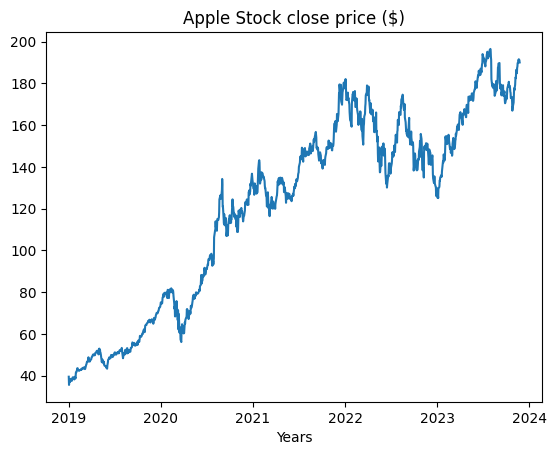

In [ ]:
plt.plot(aap['Date'],aap['Close'])
plt.title("Apple Stock close price ($)")
plt.xlabel('Years')
plt.show()

In [ ]:
aap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1234 non-null   datetime64[ns]
 1   Open       1234 non-null   float64       
 2   High       1234 non-null   float64       
 3   Low        1234 non-null   float64       
 4   Close      1234 non-null   float64       
 5   Adj Close  1234 non-null   float64       
 6   Volume     1234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.6 KB


Feature addition!!!!!!!!!!!!!!!!!!!!!1

In [ ]:
aap['MovingAverage14'] = aap['Close'].rolling(window=14).mean()
aap['MovingAverage30'] = aap['Close'].rolling(window=30).mean()
aap['day_of_week'] = aap['Date'].dt.dayofweek
aap['month'] = aap['Date'].dt.month
aap['quarter'] = aap['Date'].dt.quarter
aap['year'] = aap['Date'].dt.year
aap['week_of_year'] = aap['Date'].dt.isocalendar().week
aap['day_of_year'] = aap['Date'].dt.dayofyear
aap['f1'] = aap['Volume'].apply(np.log)
aap['f2'] = aap['Close']/aap['Open']-1
aap.dropna(inplace=True)
aap.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MovingAverage14,MovingAverage30,day_of_week,month,quarter,year,week_of_year,day_of_year,f1,f2
29,2019-02-13,42.847500,43.119999,42.480000,42.544998,41.010281,89960800,41.758393,39.796083,2,2,1,2019,7,44,18.314885,-0.007060
30,2019-02-14,42.427502,42.814999,42.345001,42.700001,41.159691,87342800,41.991250,39.903417,3,2,1,2019,7,45,18.285351,0.006423
31,2019-02-15,42.812500,42.924999,42.437500,42.605000,41.068127,98507200,42.243393,40.138667,4,2,1,2019,7,46,18.405640,-0.004847
32,2019-02-19,42.427502,42.860001,42.372501,42.732498,41.191029,75891200,42.533571,40.327583,1,2,1,2019,8,50,18.144811,0.007189
33,2019-02-20,42.797501,43.330002,42.747501,43.007500,41.456108,104457600,42.654643,40.528417,2,2,1,2019,8,51,18.464292,0.004907


In [ ]:
def linear_reg(aap, days):
  futureDays = days

  # create a new target column shifted 'X' units/days up
  aap["Prediction"] = aap[["Close"]].shift(-futureDays)

  # initializing features:
  x = aap.drop(["Prediction","Close","Date","Volume"],axis = 1).head(-futureDays)   #  aap.drop(['Prediction'],axis = 1)
  y = aap["Prediction"].head(-futureDays)

  # Initializing the linear regression model
  linear = LinearRegression().fit(x, y)

  # taking the last n inputs to be predicted
  x_tobePred = aap.drop(["Prediction","Close","Date","Volume"],axis = 1).tail(futureDays)

  # Predictions:
  linearPrediction = linear.predict(x_tobePred)

  # Finding the Root Mean Squared Error:
  rmse = np.sqrt(mean_squared_error(linearPrediction,aap['Close'].tail(futureDays)))
  # print('MSE: ',mean_squared_error(linearPrediction,aap['Close'].tail(futureDays)))
  # print('MAE: ', mean_absolute_error(linearPrediction,aap['Close'].tail(futureDays)))
  # print('R2: ', r2_score(linearPrediction,aap['Close'].tail(futureDays)))
  print('RMSE: ', rmse)

  # plotting the graph:
  predictions = linearPrediction
  valid = aap[x.shape[0]:]
  valid["Predictions"] = predictions
  plt.figure(figsize=(10, 6))
  plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
  plt.xlabel("Days")
  plt.ylabel("Close Price USD ($)")
  plt.plot(aap["Close"])
  plt.plot(valid[["Close", "Predictions"]])
  plt.legend(["Original", "Actual", "Predictions"])
  plt.xlim(1200, 1240)
  plt.show()

RMSE:  5.761723901885766


<ipython-input-96-76cd07f72ab4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


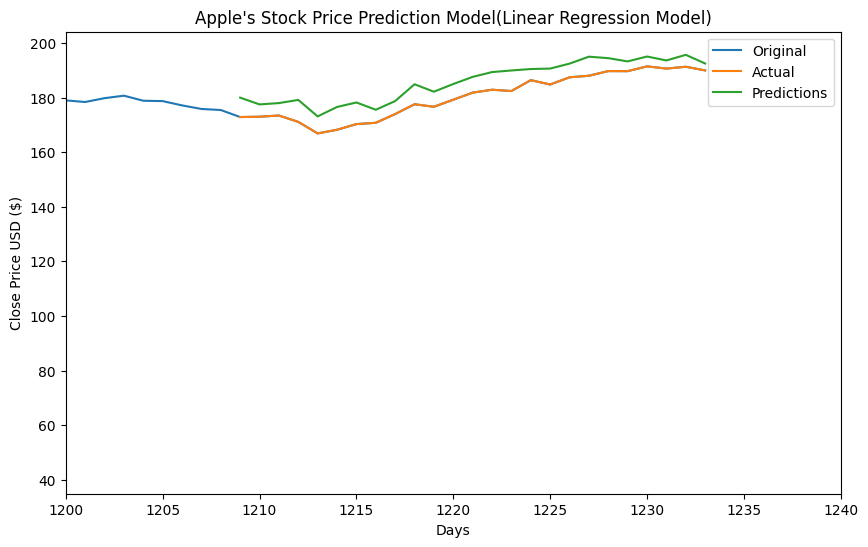

In [ ]:
linear_reg(aap,25)

In [ ]:
def rand(aap, days):
  futureDays = days

  # create a new target column shifted 'X' units/days up
  aap["Prediction"] = aap[["Close"]].shift(-futureDays)

  # converting the datetime type to seperate days, months and years.
  aap["month"] = aap["Date"].dt.month
  aap["year"] = aap["Date"].dt.year
  aap["day"] = aap["Date"].dt.day

  # initializing features which are: Open High Low Close AdjClose Volume day month and year
  x = aap.drop(["Prediction","Date"],axis = 1).head(-futureDays)   #  aap.drop(['Prediction'],axis = 1)
  y = aap["Prediction"].head(-futureDays)

  # Initializing the linear regression model
  rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
  rf_model.fit(x, y)

  # taking the last n inputs to be predicted
  x_tobePred = aap.drop(["Prediction","Date"],axis = 1).tail(futureDays)

  # Predictions:
  linearPrediction = rf_model.predict(x_tobePred)

  # Finding the Root Mean Squared Error:
  rmse = np.sqrt(mean_squared_error(linearPrediction,aap['Close'].tail(futureDays)))
  print('RMSE: ', rmse)

  # print("Linear regression Prediction =",linearPrediction)
  # plotting the graph:
  predictions = linearPrediction
  valid = aap[x.shape[0]:]
  valid["Predictions"] = predictions
  plt.figure(figsize=(10, 6))
  plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
  plt.xlabel("Days")
  plt.ylabel("Close Price USD ($)")
  plt.plot(aap["Close"])
  plt.plot(valid[["Close", "Predictions"]])
  plt.legend(["Original", "Actual", "Predictions"])
  plt.xlim(1200, 1240)
  plt.show()

RMSE:  10.507419784075267


<ipython-input-98-28b34cd6ede2>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


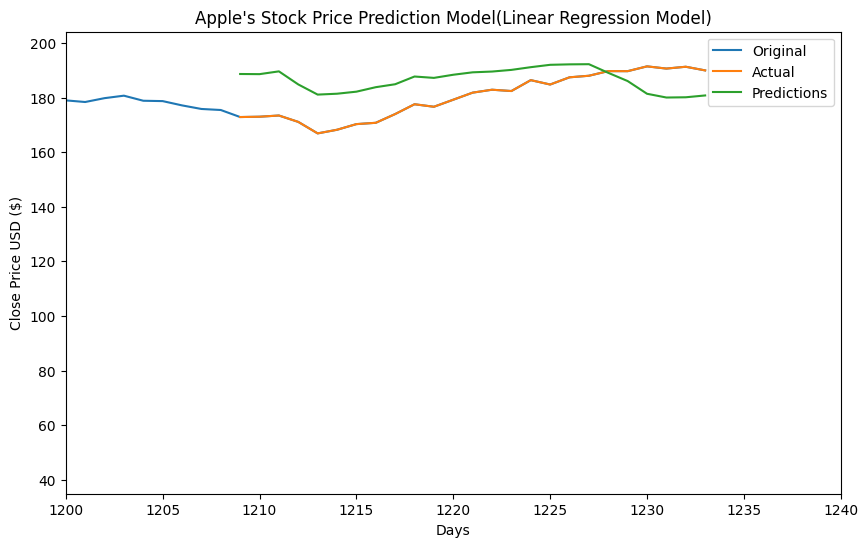

In [ ]:
rand(aap,25)

In [ ]:
def decision_tree(aap, days):
  futureDays = days

  # create a new target column shifted 'X' units/days up
  aap["Prediction"] = aap[["Close"]].shift(-futureDays)

  # converting the datetime type to seperate days, months and years.
  aap["month"] = aap["Date"].dt.month
  aap["year"] = aap["Date"].dt.year
  aap["day"] = aap["Date"].dt.day

  # initializing features which are: Open High Low Close AdjClose Volume day month and year
  x = aap.drop(["Prediction","Date"],axis = 1).head(-futureDays)   #  aap.drop(['Prediction'],axis = 1)
  y = aap["Prediction"].head(-futureDays)

  # Initializing the Decision tree model
  tree = DecisionTreeRegressor().fit(x, y)

  # taking the last n inputs to be predicted
  x_tobePred = aap.drop(["Prediction","Date"],axis = 1).tail(futureDays)

  # Predictions:
  treePrediction = tree.predict(x_tobePred)

  # Finding the Root Mean Squared Error:
  rmse = np.sqrt(mean_squared_error(treePrediction,aap['Close'].tail(futureDays)))
  print('RMSE: ', rmse)

  # plotting the graph:
  predictions = treePrediction
  valid = aap[x.shape[0]:]
  valid["Predictions"] = predictions
  plt.figure(figsize=(10, 6))
  plt.title("Apple's Stock Price Prediction Model(Decision Tree Model)")
  plt.xlabel("Days")
  plt.ylabel("Close Price USD ($)")
  plt.plot(aap["Close"])
  plt.plot(valid[["Close", "Predictions"]])
  plt.legend(["Original", "Actual", "Predictions"])
  plt.xlim(1200, 1240)
  plt.show()

RMSE:  10.641415059740952


<ipython-input-100-996d7b0f9a50>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


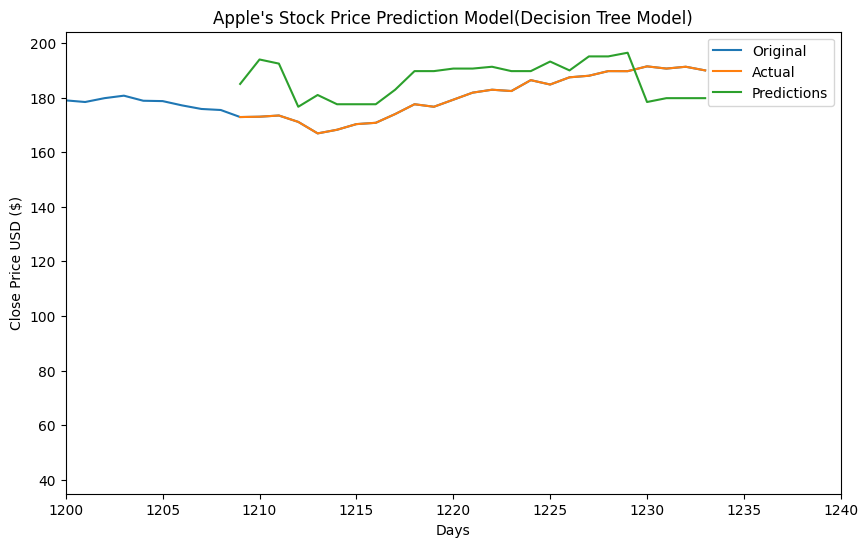

In [ ]:
decision_tree(aap,25)

In [ ]:
# create a new target column shifted 'X' units/days up
futureDays = 25
aap["Prediction"] = aap[["Close"]].shift(-futureDays)

# initializing features:
x = aap.drop(["Prediction","Close","Date","Volume"],axis = 1).head(-futureDays)   #  aap.drop(['Prediction'],axis = 1)
y = aap["Prediction"].head(-futureDays)

In [ ]:
# Evaluation the models
types = ['Linear', 'DecisionTree', 'RandomForest']
aap["Prediction"] = aap[["Close"]].shift(-futureDays)
rmse= []
meansqerr = []
mae = []
r = []
x_tobePred = aap.drop(["Prediction","Close","Date","Volume"],axis = 1).tail(futureDays)
for m_name in types:
  if m_name == 'Linear':
    model = LinearRegression().fit(x, y)
  elif m_name == 'DecisionTree':
    model = DecisionTreeRegressor().fit(x, y)
  else:
    model = RandomForestRegressor(n_estimators=100, random_state=42).fit(x, y)
  rm = 0
  ms = 0
  ma = 0
  r2 = 0
  for i in range(1000):
    linearPrediction = model.predict(x_tobePred)
    rm = rm + np.sqrt(mean_squared_error(linearPrediction,aap['Close'].tail(futureDays)))
    ms = ms + mean_squared_error(linearPrediction,aap['Close'].tail(futureDays))
    ma = ma + mean_absolute_error(linearPrediction,aap['Close'].tail(futureDays))
    r2 = r2 + r2_score(linearPrediction,aap['Close'].tail(futureDays))
  rmse.append(round(rm/1000,3))
  meansqerr.append(round(ms/1000,3))
  mae.append(round(ma/1000,3))
  r.append(round(r2/1000,3))

In [ ]:
metrics = pd.DataFrame({'Models': types,"RMSE":rmse,"MSE":meansqerr,"MAE":mae,"R2":r})
metrics

,Models,RMSE,MSE,MAE,R2
0,Linear,5.847,34.189,5.630,0.356
1,DecisionTree,9.471,89.697,9.004,-0.881
2,RandomForest,10.423,108.631,9.563,-6.759
